In [ ]:
!pip install -U keras-tuner

In [ ]:
!pip install matplotlib-venn

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from google.colab import drive

# 1. Mount Google Drive untuk akses dataset
drive.mount('/content/drive')

# 2. Path ke dataset training, validation, dan testing
train_dir = '/content/drive/MyDrive/DATASET/train'
test_dir = '/content/drive/MyDrive/DATASET/test'  # Path ke dataset testing

# 3. Preprocessing Data untuk training dan testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Menggunakan 20% data untuk validasi
)

# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # Ukuran input InceptionV3
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generator untuk data validation
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Generator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)  # Hanya rescale untuk testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# 4. Memuat model InceptionV3 tanpa layer atas (top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# 5. Membekukan layer-layernya agar tidak dilatih
for layer in base_model.layers:
    layer.trainable = False

# 6. Menambahkan layer atas (top layers) untuk klasifikasi
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Sesuaikan dengan jumlah kelas
])

# 7. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 8. Training model
history = model.fit(
    train_generator,
    steps_per_epoch=400 // 32,  # Total 400 training images
    epochs=20,
    validation_data=validation_generator,
    validation_steps=100 // 32  # Total 100 validation images
)

# 9. Evaluasi model dengan data testing
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# 10. Menyimpan model yang telah dilatih
model.save('/content/drive/MyDrive/DATASET/hasil/train/inception_model.h5')



Mounted at /content/drive
Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 215 images belonging to 5 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 415s 19s/step - accuracy: 0.5403 - loss: 1.2429 - val_accuracy: 0.9688 - val_loss: 0.1750
Epoch 2/20
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9375 - loss: 0.2278

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 978ms/step - accuracy: 0.9375 - loss: 0.2278 - val_accuracy: 1.0000 - val_loss: 0.1716
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 615ms/step - accuracy: 0.9294 - loss: 0.2300 - val_accuracy: 0.9688 - val_loss: 0.1093
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.2405 - val_accuracy: 1.0000 - val_loss: 0.1290
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 756ms/step - accuracy: 0.9450 - loss: 0.2038 - val_accuracy: 0.9583 - val_loss: 0.1180
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.0726 - val_accuracy: 1.0000 - val_loss: 0.1330
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - accuracy: 0.9588 - loss: 0.1154 - val_accuracy: 0.9479 - val_loss: 0.1610
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.2108 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 752ms/step - accuracy: 0.9628 - loss: 0.0833 - val_accuracy: 0.9688 - val_l

Test Accuracy: 98.44%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from google.colab import drive
from sklearn.metrics import classification_report
import numpy as np

# 1. Mount Google Drive untuk akses dataset
drive.mount('/content/drive')

# 2. Path ke dataset training, validation, dan testing
train_dir = '/content/drive/MyDrive/DATASET/train'
test_dir = '/content/drive/MyDrive/DATASET/test'  # Path ke dataset testing

# 3. Preprocessing Data untuk training dan testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Menggunakan 20% data untuk validasi
)

# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # Ukuran input InceptionV3
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generator untuk data validation
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Generator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)  # Hanya rescale untuk testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Tidak di-shuffle untuk memastikan urutan prediksi
)

# 4. Memuat model InceptionV3 tanpa layer atas (top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# 5. Membekukan layer-layernya agar tidak dilatih
for layer in base_model.layers:
    layer.trainable = False

# 6. Menambahkan layer atas (top layers) untuk klasifikasi
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Sesuaikan dengan jumlah kelas
])

# 7. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 8. Training model
history = model.fit(
    train_generator,
    steps_per_epoch=400 // 32,  # Total 400 training images
    epochs=20,
    validation_data=validation_generator,
    validation_steps=100 // 32  # Total 100 validation images
)

# 9. Evaluasi model dengan data testing
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Akurasi Pengujian: {test_accuracy * 100:.2f}%')

# 10. Prediksi label untuk data testing
predictions = model.predict(test_generator, steps=len(test_generator))  # Prediksi untuk semua data uji
predicted_classes = np.argmax(predictions, axis=1)

# Mendapatkan label asli
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Pastikan jumlah prediksi dan data asli cocok
print(f"Jumlah data asli: {len(true_classes)}, Jumlah prediksi: {len(predicted_classes)}")

# 11. Laporan klasifikasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Laporan Klasifikasi:\n", report)

# 12. Menyimpan model yang telah dilatih
model.save('/content/drive/MyDrive/DATASET/hasil/train/inception_model.h5')


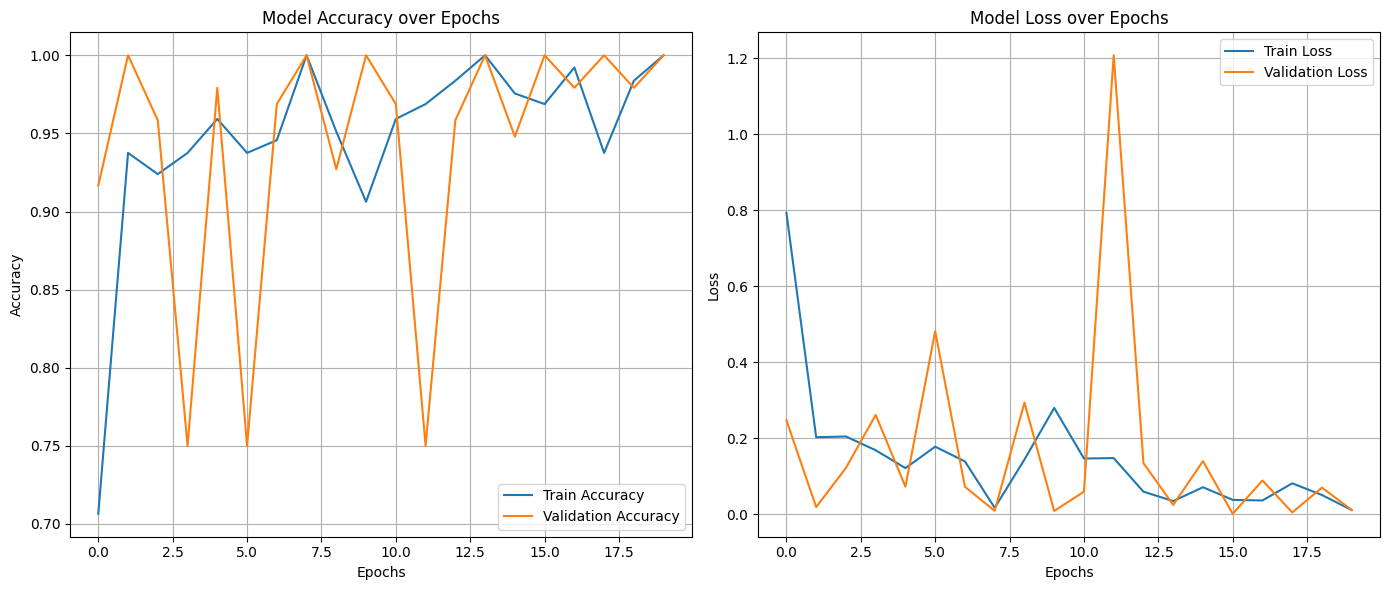

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(14, 6))

# Plot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Display both plots
plt.tight_layout()
plt.show()